# Linear regression

In this TP we are going to implement by ourselves the least squares method using different tools. We will also implement solutions for the Ridge and Lasso problems



---



There is a similar TP that I highly recommend you look at. It makes part of Numerical Tours, by Gabriel Peyré.

https://www.numerical-tours.com/

https://www.numerical-tours.com/python/

There is a chapter in the Machine Learning section that deals with this same problem of linear regression (https://nbviewer.org/github/gpeyre/numerical-tours/blob/master/python/ml_2_regression.ipynb)

Keep this site in mind, it has amazing content and exercises !

# Preambule

Run this code to import modules and define some functions that may result useful

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import MT19937, RandomState, SeedSequence
from collections import Counter

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set()

# Least squares

1. Get the Least squares solution $\beta^{LS}$ by using the exact closed formula.
2. Repeat the estimation of $\beta^{LS}$ many times with different noise $\epsilon$ added to Y at each time and plot the distribution of the coefficients $\beta^{LS}_j$
3. Get $\beta^{LS}$ using gradient descent
4. **(BONUS)** Can you generalize your gradient descent algorithm to implement Stochastic Gradient Descent?

## Least squares in closed form
Given a dataset ($X$, $Y$), find the least squares estimator $\hat{\beta}^{LS}$ using its closed form

Test your model by creating syntethic data with a linear relation with a fixed real $\beta$ to see if your method find it. Remember to add some noise $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ to the labels $y_i$

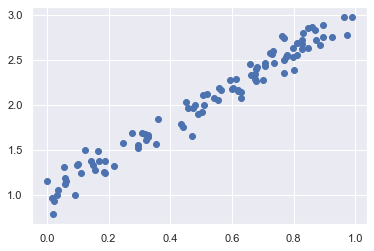

[[1.         0.54199389]
 [1.         0.61966721]
 [1.         0.05736978]
 [1.         0.81190365]
 [1.         0.86009402]
 [1.         0.62760232]
 [1.         0.68193335]
 [1.         0.67527253]
 [1.         0.48076406]
 [1.         0.73472516]
 [1.         0.15634112]
 [1.         0.72853736]
 [1.         0.21693909]
 [1.         0.7016948 ]
 [1.         0.96408854]
 [1.         0.27678254]
 [1.         0.70566135]
 [1.         0.88665806]
 [1.         0.61825175]
 [1.         0.97278719]
 [1.         0.06283428]
 [1.         0.76913557]
 [1.         0.98764383]
 [1.         0.30718976]
 [1.         0.47517711]
 [1.         0.73346427]
 [1.         0.14196247]
 [1.         0.02296369]
 [1.         0.77585356]
 [1.         0.48833229]
 [1.         0.79931907]
 [1.         0.6594762 ]
 [1.         0.00147036]
 [1.         0.03682257]
 [1.         0.76776621]
 [1.         0.67592501]
 [1.         0.67699222]
 [1.         0.0338678 ]
 [1.         0.86866354]
 [1.         0.60193068]


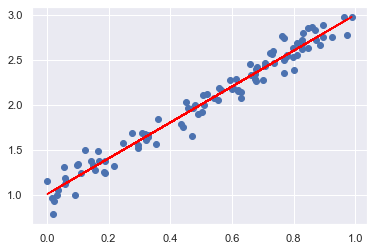

In [2]:
# Least squares closed form solution

# Set seed
seed = 42
rs = RandomState(MT19937(SeedSequence(seed)))

# Generate data
n = 100
x = rs.uniform(0, 1, n)
y = 2 * x + 1 + rs.normal(0, 0.1, n)
# Plot data
plt.scatter(x, y)
plt.show()


# Least squares closed form solution, return beta_hat

def least_squares_closed_form(x, y):
    beta_hat = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta_hat


# Add bias term
x = np.c_[np.ones(n), x]
print(x)
print(y)
# Least squares closed form solution
beta_hat = least_squares_closed_form(x, y)
#print(beta_hat)

# Plot data and regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], x @ beta_hat, color='red')
plt.show()

## Distribution of the Least Squares estimator

For the syntethic data created we are going to "see" the distribution of the estimator. To do soy, we have to sample the estimator many times.

This sampling is done over the noise added to $Y$.

Fit the model $M$ times, each time adding a different noise to Y sampled from the same distribution $\mathcal{N}(0, \sigma^2)$.

Plot an histogram of one of the $\beta^{LS}_j$ to see its distribution

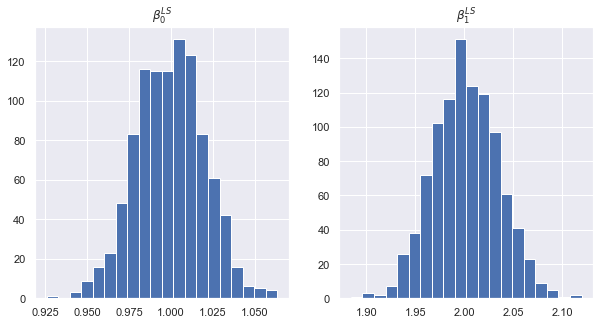

In [3]:
# Number of times to fit the model
M = 1000

# Noise standard deviation
sigma = 0.1

# Fit the model M times
beta_hat = np.zeros((M, 2))
for i in range(M):
    y = 2 * x[:, 1] + 1 + rs.normal(0, sigma, n)
    beta_hat[i] = least_squares_closed_form(x, y)
# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(beta_hat[:, 0], bins=20)
axs[0].set_title(r'$\beta^{LS}_0$')
axs[1].hist(beta_hat[:, 1], bins=20)
axs[1].set_title(r'$\beta^{LS}_1$')
plt.show()

In [4]:
# Plots should look something like this

## Least squares by gradient descent

Now we are going to try to find $\beta^{LS}$ by using a gradient descent algorithm. 

1. Derive the formula for the gradient of the objective function (sum of squared errors) with respect to $\beta$ 

2. Use this gradient to make a gradient descent starting from a random point $\beta_0$

3. Compare your obtained estimator to the $\beta^{LS}$ obtained using the exact closed form solution


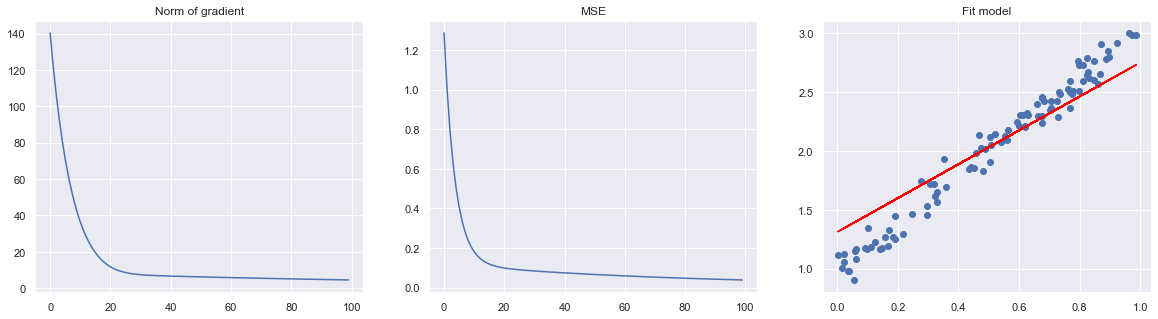

In [5]:
# Least squares by gradient descent
def least_squares_gradient_descent(x, y, beta_0, alpha, n_iter):
    beta = beta_0
    norms, mse = [], []
    for i in range(n_iter):
        g = (x.T @ (x @ beta - y))
        beta = beta - alpha * g
        norms.append(np.linalg.norm(g))
        mse.append(((x @ beta - y).T @ (x @ beta - y)) / x.shape[0])
    return beta, norms, mse


# Initial point
beta_0 = rs.uniform(-1, 1, 2)

# Learning rate
alpha = 0.001

# Number of iterations
n_iter = 100

# Least squares by gradient descent
beta_hat,norms, mse = least_squares_gradient_descent(x, y, beta_0, alpha, n_iter)

# Plot loss, norm and mse
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].plot(range(n_iter), norms)
ax[0].set_title('Norm of gradient')
ax[1].plot(range(n_iter), mse)
ax[1].set_title('MSE')
ax[2].scatter(x[:, 1], y)
ax[2].plot(x[:, 1], x @ beta_hat, color='red')
ax[2].set_title('Fit model')
plt.show()

# Ridge Regression

With the same problem than before, let us now code the Ridge regression

1. Get the Ridge solution $\beta^{ridge}$ by using the exact closed formula.
2. Get it using gradient descent
3. Plot the coefficient profiles as a function of $\lambda$

## Ridge solution in closed form

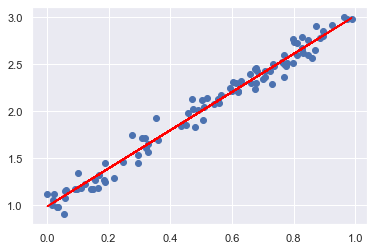

In [6]:
# Ridge regression closed form solution
def ridge_regression_closed_form(x, y, l):
    beta_hat = np.linalg.inv(x.T @ x + l * np.eye(x.shape[1])) @ x.T @ y
    return beta_hat


# Ridge regression closed form solution
def ridge_regression_closed_form(x, y, l):
    beta_hat = np.linalg.inv(x.T @ x + l * np.eye(x.shape[1])) @ x.T @ y
    return beta_hat


# Ridge parameter
l = 0.1

# Ridge regression closed form solution
beta_hat = ridge_regression_closed_form(x, y, l)

# Plot data and regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], x @ beta_hat, color='red')
plt.show()

## Ridge solution with gradient descent

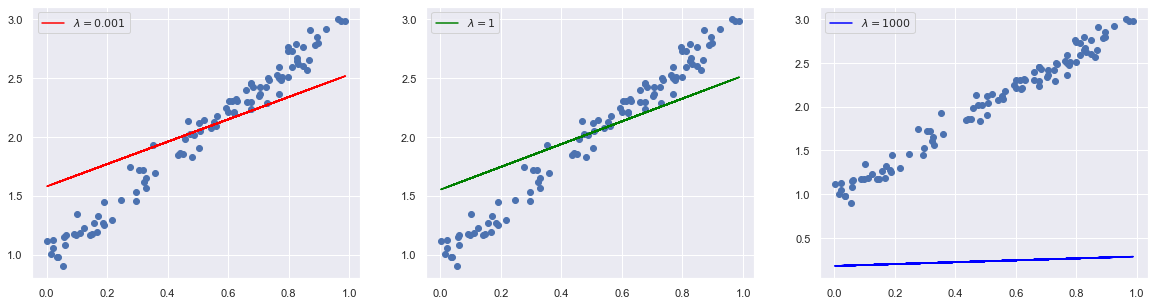

In [10]:
# Ridge regression by gradient descent
def ridge_regression_gradient_descent(x, y, beta_0, alpha, l, n_iter):
    beta = beta_0
    for i in range(n_iter):
        beta = beta - alpha * (x.T @ (x @ beta - y) + l * beta)
    return beta


# Initial point
beta_0 = rs.uniform(-1, 1, 2)

# Learning rate
alpha = 0.001

# Number of iterations
n_iter = 100

# Lambda values
l_values = np.logspace(-3, 3, 100)

# Ridge regression by gradient descent
beta_hat = np.zeros((len(l_values), 2))
for i, l in enumerate(l_values):
    beta_hat[i] = ridge_regression_gradient_descent(x, y, beta_0, alpha, l, n_iter)

# Plot data and regression line
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].scatter(x[:, 1], y)
ax[0].plot(x[:, 1], x @ beta_hat[0], color='red', label=r'$\lambda = 0.001$')
ax[0].legend()
ax[1].scatter(x[:, 1], y)
ax[1].plot(x[:, 1], x @ beta_hat[50], color='green', label=r'$\lambda = 1$')
ax[1].legend()
ax[2].scatter(x[:, 1], y)
ax[2].plot(x[:, 1], x @ beta_hat[-1], color='blue', label=r'$\lambda = 1000$')
ax[2].legend()
plt.show()

## Ridge coefficient profiles

Plot the profiles of the coefficients by making $\lambda$ vary from 0 to some high value

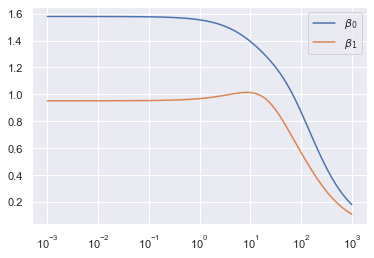

In [11]:
# Plot coefficient profiles
plt.plot(l_values, beta_hat[:, 0], label=r'$\beta_0$')
plt.plot(l_values, beta_hat[:, 1], label=r'$\beta_1$')
plt.xscale('log')
plt.legend()
plt.show()

# Lasso regression

Repeat this process but with the Lasso regression. As we know, there is no closed form solution, so let us try the following:

1. Try to implement a "gradient descent" algorithm for the Lasso problem
2. Implement ISTA, the standard algorithm for obtaining the Lasso solution
    - ISTA is a well known method, you should be able to find a lot of ressources explaining it in all levels of complexity, from implementation only to theoretical analysis.
    - Some ressources
        - https://www.ceremade.dauphine.fr/~carlier/FISTA
        - See the Numerical Tours notebook (https://nbviewer.org/github/gpeyre/numerical-tours/blob/master/python/ml_2_regression.ipynb)
        - https://arxiv.org/pdf/1501.02888.pdf, section 2.3.

3. Plot the coefficient profiles
4. **(BONUS)** Implement FISTA, the fast version of ISTA



## Trying a gradient descent for Lasso

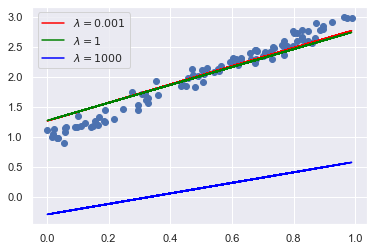

In [13]:
# Lasso regression by gradient descent
def lasso_regression_gradient_descent(x, y, beta_0, alpha, l, n_iter):
    beta = beta_0
    for i in range(n_iter):
        beta = beta - alpha * (x.T @ (x @ beta - y) + l * np.sign(beta))
    return beta


# Initial point
beta_0 = rs.uniform(-1, 1, 2)

# Learning rate
alpha = 0.001

# Number of iterations
n_iter = 100

# Lambda values
l_values = np.logspace(-3, 3, 100)

# Lasso regression by gradient descent
beta_hat = np.zeros((len(l_values), 2))
for i, l in enumerate(l_values):
    beta_hat[i] = lasso_regression_gradient_descent(x, y, beta_0, alpha, l, n_iter)

# Plot lasso regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], x @ beta_hat[0], color='red', label=r'$\lambda = 0.001$')
plt.plot(x[:, 1], x @ beta_hat[50], color='green', label=r'$\lambda = 1$')
plt.plot(x[:, 1], x @ beta_hat[-1], color='blue', label=r'$\lambda = 1000$')
plt.legend()
plt.show()

## Iterative Soft Thresholding Algorithm (ISTA)

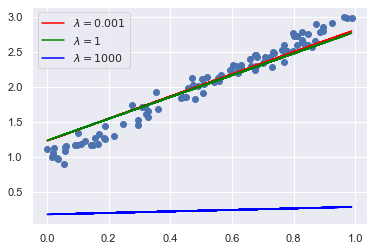

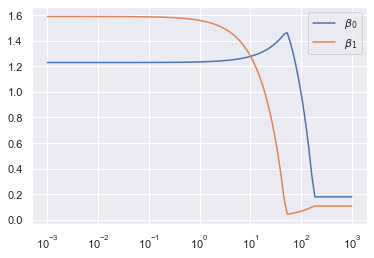

In [26]:
# Iterative Soft Thresholding Algorithm (ISTA)

# ISTA
def ista(x, y, beta_0, alpha, l, n_iter):
    beta = beta_0
    for i in range(n_iter):
        beta = np.sign(beta) * np.maximum(np.abs(beta) - alpha * l, 0) - alpha * (x.T @ (x @ beta - y))
    return beta


# Initial point
beta_0 = rs.uniform(-1, 1, 2)

# Learning rate
alpha = 0.001

# Number of iterations
n_iter = 100

# Lambda values
l_values = np.logspace(-3, 3, 100)

# ISTA
beta_hat = np.zeros((len(l_values), 2))
for i, l in enumerate(l_values):
    beta_hat[i] = ista(x, y, beta_0, alpha, l, n_iter)

# Plot ISTA regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], x @ beta_hat[0], color='red', label=r'$\lambda = 0.001$')
plt.plot(x[:, 1], x @ beta_hat[50], color='green', label=r'$\lambda = 1$')
plt.plot(x[:, 1], x @ beta_hat[-1], color='blue', label=r'$\lambda = 1000$')
plt.legend()
plt.show()

# Plot coefficient profiles
plt.plot(l_values, beta_hat[:, 0], label=r'$\beta_0$')
plt.plot(l_values, beta_hat[:, 1], label=r'$\beta_1$')
plt.xscale('log')
plt.legend()
plt.show()

## Lasso coefficient profiles

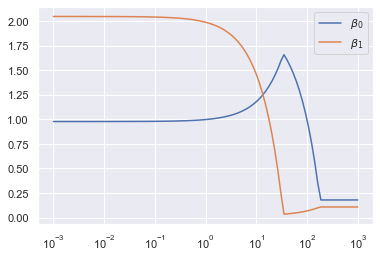

In [25]:
# Plot coefficient profiles
plt.plot(l_values, beta_hat[:, 0], label=r'$\beta_0$')
plt.plot(l_values, beta_hat[:, 1], label=r'$\beta_1$')
plt.xscale('log')
plt.legend()
plt.show()